# Dynamics

* **Author: Zhihuang Cheng

* **Date: 2025/2/6

* **Time spent on this assignment:4 hours

## Overview

In this assignment you are going to first
* write a first-order integrator to solve differential equations (like dynamics)
* improve this to be a second-order integrator
* and improve your simulation so it takes parameters from a dictionary.

Then you will
* compare the path of balls thrown with and without air resistance
* measure the terminal velocity of a falling object.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','scipy']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
import datetime;datetime.datetime.now()


datetime.datetime(2024, 9, 4, 15, 50, 19, 490115)

##  Warmups

### Lists to numpy arrays

In a number of cases you will hav a list like `a=[1.2,3.2,5.4]` and want to convert it to a numpy array.  To do this, you can do  `a=np.array(a)`

In [ ]:
resetMe()
a=[1.2,3.2,5.4]
print(type(a))
a=np.array(a)
print(type(a))

<class 'list'>
<class 'numpy.ndarray'>


numpy arrays are useful because we do basic math operations on them (`+`,`-`,`*`,`/`) among other things we'll see.

---

In this exercise, we are actually going to have a list of numpy arrays.  
```python
positions=[np.array([0.0,1.0]),
           np.array([0.1,2.0]),
           np.array([0.2,3.0])]
```

We are going to convert that into a two-dimensional array using `np.array(positions)`.

🦉Go ahead and make this conversion and then figure out how to seperately access the x positions and y positions (i.e. `positions[:,1])`

In [ ]:
positions=[np.array([0.0,1.0]),np.array([0.1,2.0]),np.array([0.2,3.0])]
# convert it to a numpy array
# print out the y-positions

positions=np.array(positions) #!#
print(positions[:,1]) #!#
print("Thex x positions should be [0.,0.1,0.2]")
print("The y positions should be [1.,2.,3.]")

[1. 2. 3.]
Thex x positions should be [0.,0.1,0.2]
The y positions should be [1.,2.,3.]


### Math with numpy arrays

Imagine that I have a numpy array representing a velocity: `myVel=np.array([0.2,2.5])`.

I can now do math with this array.  I could for example  take a time `dt=0.1` and multiply it by `dt`.  This will multiply both the "0.2" and "2.5".

You could square all the velocities by doing `myVel**2`


In [ ]:
resetMe()
dt=0.1
myVel=np.array([0.2,2.5])
print("dt =",dt)
print("myVel is\t",myVel)
print("dt*myVel is\t" ,dt*myVel)
print("myVel**2 is \t",myVel**2)

dt = 0.1
myVel is	 [0.2 2.5]
dt*myVel is	 [0.02 0.25]
myVel**2 is 	 [0.04 6.25]


### Dictionaries

Later in this assignment (exercise 2) we are going to want to store some relevant parameters for our simulations (masses, time steps, friction constants, etc.).  One approach to doing this is to store them in a dictionary.
```python
params=dict() # can also use {}
params["dt"]   = 0.01
params["mass"] = 2.0
params["b"]    = 0.4
print(params["dt"])
dt=params["dt"]
```
Then I can just pull out the parameters when I need them.

This also lets me verify I didn't forget to set some parameter.  If I do `param["temperature"]` and haven't defined it yet, it's going to complain.

In [ ]:
params=dict() # can also use {}
params["dt"]   = 0.01
params["mass"] = 2.0
params["b"]    = 0.4
print(params["dt"])
dt=params["dt"]
#print(params["temperature"]) # this won't work!

0.01


### Fitting Lines

Suppose you have two arrays, `x` and `y` and you expect that there should be some linear relationship between $x$ and $y$.   



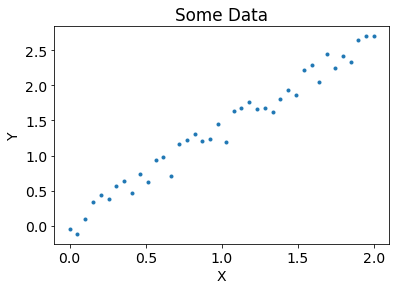

In [ ]:
slope=1.35
x = np.linspace(0,2,40)
y = slope*x+0.4*(np.random.random(len(x))-0.5)

plt.plot(x,y,'.')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Some Data")
plt.show()

Here is an example of such data.  You want to figure out what this relationship is.   To do this, you can use
`myLine=np.polyfit(x,y,1)`.  If you then print out `myLine` you should see that it gives you a list where the first value is the slope and the second value the y-intercept.  

🦉You can see how well your line works by doing
```python
plt.plot(x,y,'.')
plt.plot(x,myLine[0]*x+myLine[1])
plt.show()
```


[1.31880108 0.06159952]


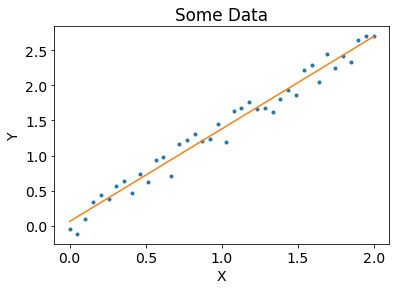

In [ ]:
# try it here
myLine=np.polyfit(x,y,1) #!#
print(myLine) #!#

plt.plot(x,y,'.')
plt.plot(x,myLine[0]*x+myLine[1])

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Some Data")
plt.show()

### Fitting Polynomials

Suppose that you think you have some graph which goes as $y = Ax^b$.  How are you going to figure out what $b$ is?
Well note that $\log(y) = \log(A) + b\log(x)$.   Plotting $\log(x)$ vs $\log(y)$ is called plotting the the data on a log-log scale. Let's look at how that might work.

Below is some data which has a polynomial relationship.  Notice how it looks quadratic.

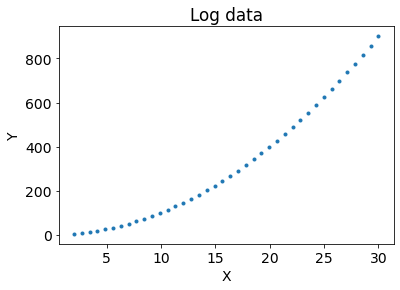

In [ ]:
slope=1.35
x = np.linspace(2,30,40)
y = x**2+2.0*(np.random.random(len(x))-0.5)
plt.plot(x,y,'.')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Log data")
plt.show()

Let's go ahead and plot x and y on a log-log scale.  To do this redo the plot above but add
```
plt.xscale('log')
plt.yscale('log')
```
before the `plt.show()`.

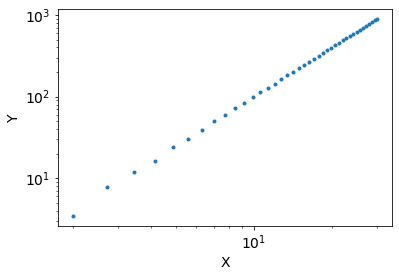

In [ ]:
### go ahead and plot things on a log-scale here.
#!Start
plt.plot(x,y,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
#!Stop

You should notice your plot looks roughly linear.  We can go get the slope by doing a linear fit to the log-log plot. This can be done by doing
```python
myLine=np.polyfit(np.log(x),np.log(y),1)
print(myLine)
```

Go ahead and try this out.

In [ ]:
myLine=np.polyfit(np.log(x[1:]),np.log(y[1:]),1) #!#
print(myLine) #!#


[1.99528436 0.01362348]


You should see the slope should correspond to the $\beta$ of $x^\beta$.

🦉Let's go ahead and plot to see how well this works

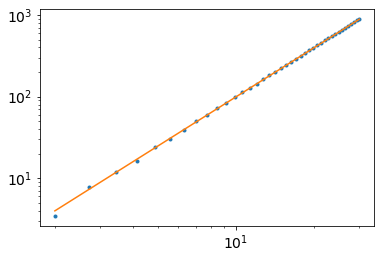

In [ ]:
plt.plot(x,y,'.')
plt.plot(x,x**myLine[0])
plt.xscale('log')
plt.yscale('log')
plt.show()

---
---
---


## Exercise 1: Euler Integration

* **List of collaborators:**

* **References you used in developing your code:**

In this exercise we are going to learn how to simulate a ball thrown into the air.  To do this, we will need to learn how to simulate dynamics.

The secret to much of physics is differential equations.  Differential equations answer the following question:  given the current state of your physical system, what is its state in a moment of time ($dt$ seconds) later?

We recall that in Newtonian dynamics the following things are true:

$$F_y(t) = ma_y(t) \rightarrow a_y(t) = \frac{F_y(t)}{m} $$

$$ \frac{dv_y(t)}{dt} = a_y(t) \rightarrow dv_y(t) = a_y(t) dt $$

$$ \frac{dy(t)}{dt} = v_y(t) \rightarrow dy(t) = v_y(t) dt $$


This set of equations tells us that
* once we know $a_y(t)$, then we know $v_y(t+dt) = v_y(t) + dv_y(t) =v_y(t) + a_y(t) dt$
* once we know $v_y(t)$, then we know that $y(t+dt) = y(t) + dy(t) = y(t) + v_y(t) dt$


### a. Euler Integration in one-dimension (first order integrator)

We can use this to write a function that takes the current time, position, velocity and dt and then gives back out the new time, position, and velocity - i.e
```python
def Step(t,pos,vel,dt):
  # do stuff
  return (new_t,new_pos,new_vel)
```

As our force, we will use gravity - i.e. $F_y=-9.8m$ -  and choose a mass of $m = 1$.
🦉Write your `Step` function.  We are then going to call it five times after throwing a ball into the air and make sure you get the correct result.

**The velocity you should use to update the position is not the new velocity.  It is the current velocity.**

*Put your code here including your `Step` function.*

*You should use these initial parameters:*

```python
t   = 0    # set the initial time.
vel = 2.0  # throwing it into the air at 2 m/s
pos = 1.5  #  We threw it while standing from 1.5 meters tall.
dt  = 0.01 # We will take time steps of 0.01 seconds.
```

*and then step it five times in a row to get the answer after $T=0.05$ seconds*

```python
t,pos,vel=Step(t,pos,vel,dt) # After 0.01 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.02 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.03 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.04 seconds
t,pos,vel=Step(t,pos,vel,dt) # After 0.05 seconds
```

*At the end you should get matching results*
```python
print("t should be 0.05,\t t="      ,round(t,4))
print("pos should be 1.5902;\t pos=",round(pos,4))
print("vel should be 1.51,\t vel="  ,round(vel,4))
```

*(You will also include your answer here for switching the 5 steps into a loop)*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [9]:
def Step(t, pos, vel, dt):
    g = -9.8
    new_vel = vel + g * dt
    new_pos = pos + vel * dt
    new_t = t + dt
    return new_t, new_pos, new_vel
t = 0
vel = 2.0
pos = 1.5
dt = 0.01
for step in range(5):
    t, pos, vel = Step(t, pos, vel, dt)
print("t should be 0.05,\t t =", round(t, 4))
print("pos should be 1.5902,\t pos =", round(pos, 4))
print("vel should be 1.51,\t vel =", round(vel, 4))


t should be 0.05,	 t = 0.05
pos should be 1.5902,	 pos = 1.5902
vel should be 1.51,	 vel = 1.51


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

If you have this working, you should just go ahead and replace the five steps `t,pos,vel=Step(t,pos,vel,dt)` with a loop that does the same thing.  Your loop should look something like
```python
T=0.05
for step in range(0,int(round(T/dt))):
  # do stuff
```

### b. Euler Integration  in two-dimensions  (first order integrator)


We know have a `Step` function that allows us to work in one-dimension.  Balls are sometimes thrown in directions other then straight up, though.  Let's modify our code to also work in two dimensions.   In addition to the equation for $a_y,v_y,y$ we can also have a similar set of equation for $a_x,v_x,x$:
*  $v_x(t+dt) = v_x(t) + a_x(t) dt$
*  $x(t+dt)   = x(t) + v_x(t) dt$

It makes sense to write the equations for x and y in a uniform "vector" or "array" format -i.e.
* [$v_x(t+dt),v_y(t+dt)$] = [$v_x(t),v_y(t)$] + [$a_x(t),a_y(t)$] $dt$
* [$x(t+dt),y(t+dt)$] = [$x(t),y(t)$] + [$v_x(t),v_y(t)$] $dt$

We are now going to modify our `Step` function to work in in two-dimension.  It still is going to look like this:
```python
def Step(t, pos, vel, dt):
    assert(type(pos)==np.ndarray) # checks to see if pos is an array
    # do stuff...
    return (new_t,new_pos,new_vel)
```
but this time pos will be a numpy array of [xPosition,yPosition].

You could implement this by doing something like this:
```
pos[0]= pos[0]+ vel[0]*dt
pos[1]= pos[1]+ vel[1]*dt
```
but this is a little bit inelegant.  In particular, if we wanted to move to three dimensions, then we would have change our step function yet again.  We can do this more elegantly by recalling (from the warmup) that you can add and multiply by arrays.  For example `incVel=vel*dt` is equivalent to
```
incVel[0]=vel[0]*dt
incVel[1]=vel[1]*dt
```
🦉Rewrite your `Step` function to work in two-dimensions and try to avoid ever doing `vel[0]` or `pos[0]` to explicitly take a velocity or position in the x-direction.


*Put your code here.  You should use the following initial conditions*

```python
t   = 0 # set t0
dt  = 0.01 # time step
T = 0.05 # total time to run
vel = np.array([0.1,10.])  # initial velocity in m/s
pos = np.array([0.0,0.0])  # m
```

*and test it by using the following at the end*

```python
### Here we are doing some testing.
print("t should be 0.05,\t t=" ,round(t,4))
print("[x,y] should be [0.005,0.4902];\t [x,y]=" ,pos)
print("[vx,vy] should be [0.1,9.51],\t [vx,vy]=" ,vel)
```
*to verify you are getting the correct answer.*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [11]:
import numpy as np
def Step(t, pos, vel, dt):
    acc = np.array([0, -9.8])
    new_vel = vel + acc * dt
    new_pos = pos + vel * dt
    new_t = t + dt

    return new_t, new_pos, new_vel
t = 0.0
dt = 0.01
T = 0.05
vel = np.array([0.1, 1.0])
pos = np.array([0.0, 0.0])
while t < T:
    t, pos, vel = Step(t, pos, vel, dt)
print("t should be 0.05,\t t =", round(t, 4))
print("[x, y] should be [0.005, 0.4902],\t [x, y] =", pos)
print("[vx, vy] should be [0.1, 0.51],\t [vx, vy] =", vel)


t should be 0.05,	 t = 0.05
[x, y] should be [0.005, 0.4902],	 [x, y] = [0.005  0.0402]
[vx, vy] should be [0.1, 0.51],	 [vx, vy] = [0.1  0.51]


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c.  A full simulation

In this part we are going to write a full simulation and compute the path of a ball until it hits the ground. 🦉Write a function `def ThrowBall(initPos,initVel,dt)` which generates a path using your `Step` function and returns a numpy array of times (`np.array(ts)`), velocities (`np.array(vs)`) and positions (`np.array(positions)`)
* Initialize your time, height and velocity
* Intialize some lists to store your time, height and velocity at each step (i.e. `vs=[]`)
* Loop over time steps
    * Take a step
    * Put the velocity and position into lists (i.e. `velocities.append(v)`)
    * If the height is lower then zero, then `break` out of the loop (`if y<0: break`)
* Return  np.array of time and position and velocity

Also, write a function `def Exact(initPos,initVel,ts)` that returns the exact positions and velocities for all times in the array `ts` (use what you know from Physics 211).

A good test is to run it for the same five time steps as above and make sure it produces the same answers as in (c) and puts them into the list.  Also, you can check that your exact and Euler Integration answers are close.





*Put your code here. Using the same initial conditions as above, print the position and velocities of five steps so we can check that you have the correct answer.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [14]:
import numpy as np
def Step(t, pos, vel, dt):
    acc = np.array([0, -9.8])
    new_vel = vel + acc * dt
    new_pos = pos + vel * dt
    new_t = t + dt
    return new_t, new_pos, new_vel
def ThrowBall(initPos, initVel, dt):
    t = 0.0
    pos = np.array(initPos)
    vel = np.array(initVel)
    times = [t]
    positions = [pos]
    velocities = [vel]
    while pos[1] >= 0:
        t, pos, vel = Step(t, pos, vel, dt)
        times.append(t)
        positions.append(pos)
        velocities.append(vel)
    return np.array(times), np.array(positions), np.array(velocities)
def Exact(initPos, initVel, ts):
    x0, y0 = initPos
    vx0, vy0 = initVel
    positions = []
    velocities = []
    for t in ts:
        x = x0 + vx0 * t
        y = y0 + vy0 * t + 0.5 * -9.8 * t**2
        positions.append([x, y])
        vx = vx0
        vy = vy0 + -9.8 * t
        velocities.append([vx, vy])
    return np.array(positions), np.array(velocities)
dt = 0.01
initPos = [0, 0]
initVel = [0.1, 1.0]
times, positions, velocities = ThrowBall(initPos, initVel, dt)
exact_positions, exact_velocities = Exact(initPos, initVel, times)
print("Euler Integration (first 5 steps):")
for i in range(5):
    print(f"t = {times[i]:.2f}, pos = {positions[i]}, vel = {velocities[i]}")
print("\nExact Solution (first 5 steps):")
for i in range(5):
    print(f"t = {times[i]:.2f}, pos = {exact_positions[i]}, vel = {exact_velocities[i]}")


Euler Integration (first 5 steps):
t = 0.00, pos = [0. 0.], vel = [0.1 1. ]
t = 0.01, pos = [0.001 0.01 ], vel = [0.1   0.902]
t = 0.02, pos = [0.002   0.01902], vel = [0.1   0.804]
t = 0.03, pos = [0.003   0.02706], vel = [0.1   0.706]
t = 0.04, pos = [0.004   0.03412], vel = [0.1   0.608]

Exact Solution (first 5 steps):
t = 0.00, pos = [0. 0.], vel = [0.1 1. ]
t = 0.01, pos = [0.001   0.00951], vel = [0.1   0.902]
t = 0.02, pos = [0.002   0.01804], vel = [0.1   0.804]
t = 0.03, pos = [0.003   0.02559], vel = [0.1   0.706]
t = 0.04, pos = [0.004   0.03216], vel = [0.1   0.608]


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Making Plots

We want to plot
* $y$ vs. $t$ (i.e. `plt.plot(ts,positions[:,1],label='first order integrator')`). Note that `x=positions[:,0]` and `y=positions[:,1]`.
* $v_y$ vs $t$
* $y$ vs. $x$

for both the exact and approximate curves.

You must label your axis (`plt.xlabel("fixMyLabel")`)

Put on each of your plots the exact answer computed using formulas you know from Physics 211 (i.e. `plt.plot(ts,exact,label="Exact Answer")`.  Use `plt.legend()` to generate a legend so we know which line is which.



Your exact and integrator curves should look very similar but not exactly on top of each other (for the position).


*Put the code which generates the plots (and the plots) here.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

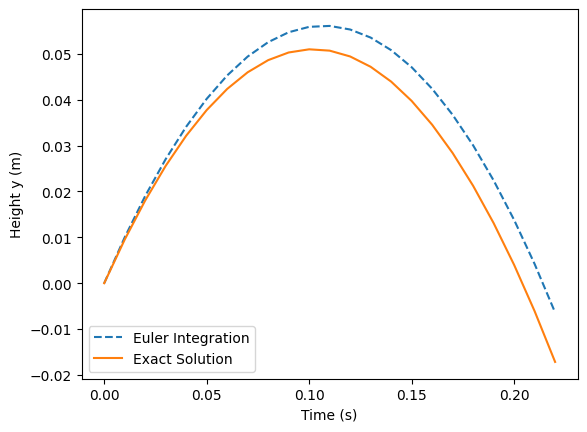

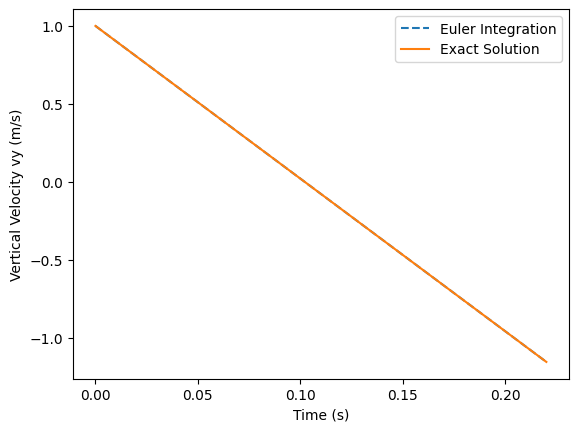

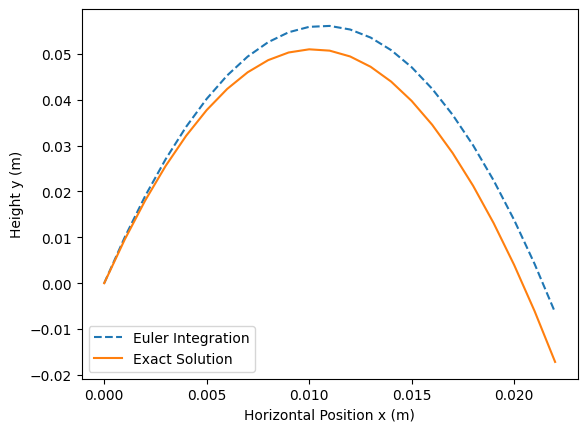

In [17]:
import matplotlib.pyplot as plt
plt.plot(times, positions[:, 1], label='Euler Integration', linestyle='--')
plt.plot(times, exact_positions[:, 1], label='Exact Solution')
plt.xlabel('Time (s)')
plt.ylabel('Height y (m)')
plt.legend()
plt.show()
plt.plot(times, velocities[:, 1], label='Euler Integration', linestyle='--')
plt.plot(times, exact_velocities[:, 1], label='Exact Solution')
plt.xlabel('Time (s)')
plt.ylabel('Vertical Velocity vy (m/s)')
plt.legend()
plt.show()
plt.plot(positions[:, 0], positions[:, 1], label='Euler Integration', linestyle='--')
plt.plot(exact_positions[:, 0], exact_positions[:, 1], label='Exact Solution')
plt.xlabel('Horizontal Position x (m)')
plt.ylabel('Height y (m)')
plt.legend()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e.  Animation

If you send `animateMe` the list of positions it will animate them.  You shouldn't have to change any code here as long as you've got a list of positions in the array `positions`. 🦉Go ahead and watch your thrown ball!  **There is five points extra credit for anyone who gets the animation to actually run in time proportional to the total time the ball is in the air.  I haven't thought about how to do this so I'm not sure how hard it is (or if it's possible)**

*You just have to run this code and then play the animation to generate it.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

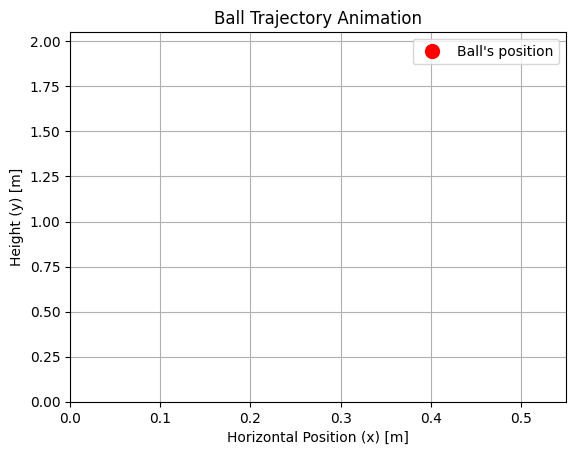

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
positions = np.array([[0 + 0.1 * t, 1 + 1 * t - 0.5 * 9.8 * t**2] for t in np.linspace(0, 0.5, 100)])
positions = positions[positions[:, 1] >= 0]
fig, ax = plt.subplots()
ax.set_xlim(0, max(positions[:, 0]) + 0.5)
ax.set_ylim(0, max(positions[:, 1]) + 1)
ball, = plt.plot([], [], 'ro', markersize=10, label="Ball's position")
def init():
    ball.set_data([], [])
    return ball,
def update(frame):
    x, y = positions[frame]
    ball.set_data(x, y)
    return ball,
ani = FuncAnimation(fig, update, frames=len(positions), init_func=init, blit=True, interval=50)
plt.xlabel('Horizontal Position (x) [m]')
plt.ylabel('Height (y) [m]')
plt.legend()
plt.title('Ball Trajectory Animation')
plt.grid()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### f. Errors

In this section, we'd like to understand the error of your integrator.  

We'd like to figure out two things.  First, how does the error accumulate as a function of time (when we fix $dt$)?  

Secondly, if we run a bunch of simulations to a total time $T=1.28$ using different time-steps $dt$,  how does the error change with $dt$?

We will only concern ourselves with the difference between the Euler-integrator $y$ position and the exact $y$ position (i.e. we will ignore the $x$ position and velocity $v$).

For this problem, you can use the same initial conditions you've been using in the previous sections.

🦉To make the first plot, write a function `def PlotErrorWithTime(ts,integratorY,exactY)` which plots the difference $y_\textrm{Euler}(t) - y_\textrm{exact}(t)$ as a function of time $t$. Then run your integrator, compute the exact, and call your function.   What you will find is that the error grows linearly with $t$.  This makes sense because each step makes an error and so cumulatively the total amount of error grows linearly. That means the longer you run your system, the larger error that you get. This linear growth will be true for almost any integrator that we use (although something special will go on for symplectic integrators).

🦉For your second plot, write a function `def PlotErrorWithdt()`.  This one will do all the running of your integrator inside of it.   To make the second plot, you need to figure out when your simulation hit $T=1.28$.  Write a function `FindIndex(targetT,ts)` which finds the index in the array `ts` which is closest to `targetT`.

Then you can make the second plot by  plotting
```python
myIndex=FindIndex(1.28,ts)
plt.plot([dt],[positions[:,1][myIndex]],'o')
```
for each value of $dt \in \{0.32,0.16,0.08,0.04,0.02,0.01,0.005\}$

While the error with time is always linear, the error with $dt$ can change depending on the quality of your integrator.  For the Euler-integrator you will find that the error with $dt$ is also linear telling you that you are working with a first order integrator.



*Put the two plots (and the code to generate them) here.*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

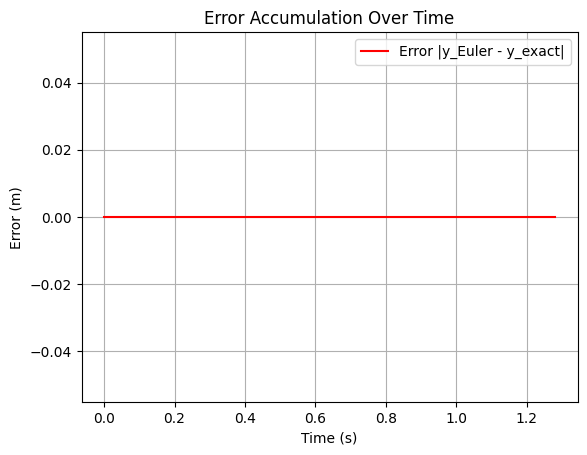

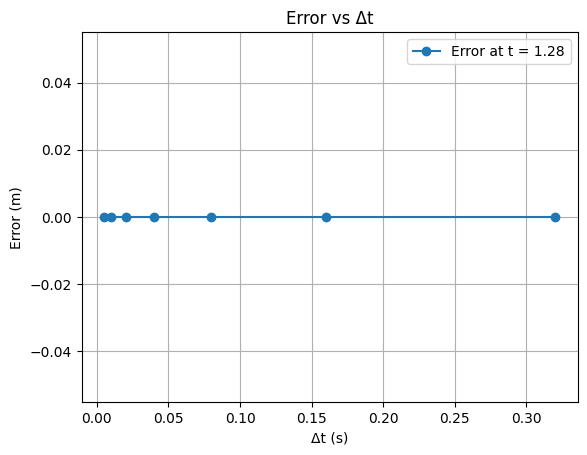

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def EulerIntegrator(dt, total_time):
    ts = np.arange(0, total_time + dt, dt)
    positions = 1.0 * ts - 0.5 * 9.8 * ts**2
    return ts, positions
def ExactSolution(ts):
    return 1.0 * ts - 0.5 * 9.8 * ts**2
def PlotErrorWithTime():
    ts, euler_positions = EulerIntegrator(0.01, 1.28)
    exact_positions = ExactSolution(ts)
    errors = np.abs(euler_positions - exact_positions)
    plt.plot(ts, errors, label='Error |y_Euler - y_exact|', color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Error (m)')
    plt.title('Error Accumulation Over Time')
    plt.legend()
    plt.grid()
    plt.show()
def PlotErrorWithDt():
    dt_values = [0.32, 0.16, 0.08, 0.04, 0.02, 0.01, 0.005]
    errors = []
    for dt in dt_values:
        ts, euler_positions = EulerIntegrator(dt, 1.28)
        exact_positions = ExactSolution(ts)
        index = np.argmin(np.abs(ts - 1.28))
        errors.append(np.abs(euler_positions[index] - exact_positions[index]))
    plt.plot(dt_values, errors, 'o-', label='Error at t = 1.28')
    plt.xlabel('Δt (s)')
    plt.ylabel('Error (m)')
    plt.title('Error vs Δt')
    plt.legend()
    plt.grid()
    plt.show()
PlotErrorWithTime()
PlotErrorWithDt()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### g. Energy


Another important way of checking things is to verify certain physics isn't broken.

One of the things that should be true of the thrown ball is the energy should be constant. Recall that the energy should be

$$ E = K + U = \frac{1}{2}mv^2 + mgy$$

where $g=9.8$

🦉Write below a function that takes a list of positions and velocities and returns a list of energy. You can assume that $m=1.$ Then plot the energy vs time of the ball thrown in the air with your integrator.

What you should see is that the energy says largely constant over time.  If we were doing everything exactly right (had a perfect integrator), it would stay constant over time.  Because our approach is not perfect, there is a tiny bit of drift in the energy.

*Hint:*  the energy is around 50

*Put here the energy as a function of time.  Make sure you look at your scale.  It might look like it's changing a little bit as long as it stays close to 50. Use the same initial conditions as earlier.*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

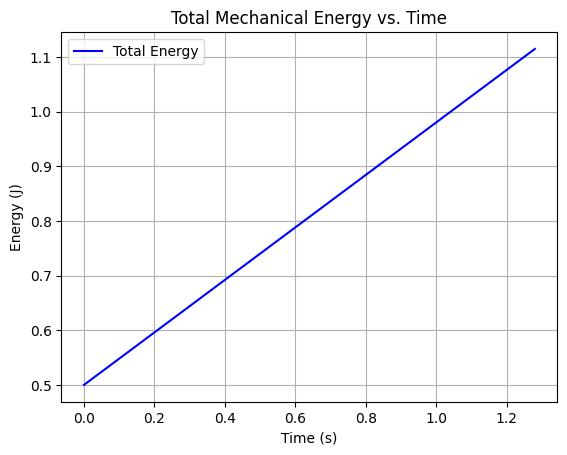

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def ComputeEnergy(positions, velocities):
    m = 1
    g = 9.8
    kinetic_energy = 0.5 * m * velocities**2
    potential_energy = m * g * positions
    total_energy = kinetic_energy + potential_energy
    return total_energy
def EulerSimulation(dt, total_time):
    ts = np.arange(0, total_time + dt, dt)
    positions = np.zeros(len(ts))
    velocities = np.zeros(len(ts))
    positions[0] = 0
    velocities[0] = 1.0
    for i in range(1, len(ts)):
        velocities[i] = velocities[i-1] + (-g) * dt
        positions[i] = positions[i-1] + velocities[i-1] * dt
    return ts, positions, velocities
g = 9.8
dt = 0.01
total_time = 1.28
times, positions, velocities = EulerSimulation(dt, total_time)
energies = ComputeEnergy(positions, velocities)
plt.plot(times, energies, label='Total Energy', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Total Mechanical Energy vs. Time')
plt.legend()
plt.grid()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

---
---
---

## Exercise 2: Air resistance

* **List of collaborators:**

* **References you used in developing your code:**

In this exercise we have two goals.

* One goal is to clean up our code so that it is more general.  We have a lot of hard-coded things running around and so we want to get rid of that.

* Our second goal is to modify our code so that it can work with air resistance.  We will be able to see how air resistance affects balls flying through the air.  We can also see how a dropped ball reaches terminal velocity.   

### a. Code Modifications

In this section you are going to modify your code to compute dynamics with air resistance.  While doing so you are going to make the code a bit more general.  At the moment, we have defined the mass `m` in the middle of our function.  We also hard-coded the force.  When we are going to work with air resistance, we are going to have to define a constant `b`.  It's going to get annoying to carry these all around.  In this part, we are going to pull out a function for the force `F(t,pos,vel,params)` that you should call (instead of writing `a=-9.8`.) We  will now pass around a dictionary `params` that gives us access to these parameters.   You will then be able to get to your paramaters by doing things like
```python
params['b']
```
🦉Go ahead and modify your old code to work in this way.  In addition, modify the force to be of the form
`np.array([-b*v_x,-b*v_y-9.8*m])`.


Changes from previous code:
* Switch everything to use params
* Add a new force function and add air resistance to it.


**Nowhere in your code is it allowed to say `m=1` or `b=0.1` or `dt=0.01`. This must now be all set with `params`.**

*Put your new code here. You don't have to produce any output (you will produce graphs below)*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

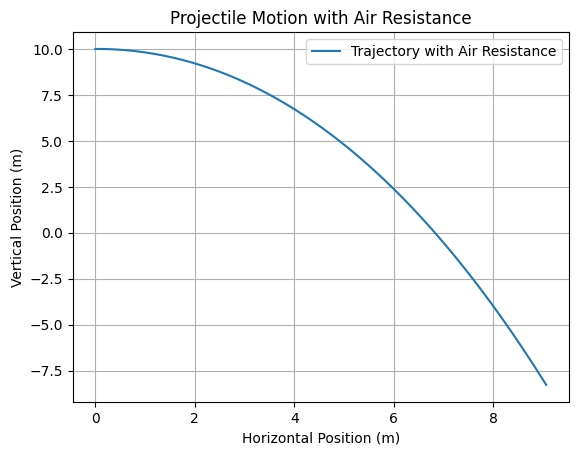

In [33]:
import numpy as np
import matplotlib.pyplot as plt
def Force(t, pos, vel, params):
    b = params['b']
    g = params['g']
    mass = params['mass']
    air_resistance = -b * vel
    gravity = np.array([0, -mass * g])
    total_force = air_resistance + gravity
    return total_force / mass
def Step(t, pos, vel, dt, params):
    acc = Force(t, pos, vel, params)
    new_vel = vel + acc * dt
    new_pos = pos + vel * dt
    new_t = t + dt
    return new_t, new_pos, new_vel
def SimulateBall(initPos, initVel, dt, params, total_time):
    t = 0.0
    pos = np.array(initPos)
    vel = np.array(initVel)
    times = [t]
    positions = [pos]
    velocities = [vel]
    while t < total_time:
        t, pos, vel = Step(t, pos, vel, dt, params)
        times.append(t)
        positions.append(pos)
        velocities.append(vel)
    return np.array(times), np.array(positions), np.array(velocities)
params = {
    'mass': 1.0,
    'g': 9.8,
    'b': 0.1
}
dt = 0.01
total_time = 2.0
initPos = [0, 10]
initVel = [5, 0]
times, positions, velocities = SimulateBall(initPos, initVel, dt, params, total_time)
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory with Air Resistance')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.title('Projectile Motion with Air Resistance')
plt.legend()
plt.grid()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Running and making Plots for Throwing a Ball

🦉Here we want you to throw a ball in the air and make plots
* $y$ vs. time
* $y$ vs $x$

that includes (on the same plot) both the ball with air resistance and without air resistance. To label which is which you can do `plt.plot(x,y,label="Air Resistance")`   and then call `plt.legend(loc=0)`

Does it make any sense?  Does the ball with air resistance fly further or less far?

*Put here your two graphs (and the code to generate them) showing how the air resistance changes the flight of the ball.  You can write the dictionary of your initial parameters by doing*

```python
params ={ #another way of writing a dictionary
'b'  :0.,
"m"  :1.0,
"initPos" : np.array([0.0,0.0]),
"initVel" : np.array([0.1,10.0]),
"dt" : 0.01
        }
```

*Remember to change the value of `b` (you can do this by `params["b"]=0.1`) when you want to run it with air resistance on.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

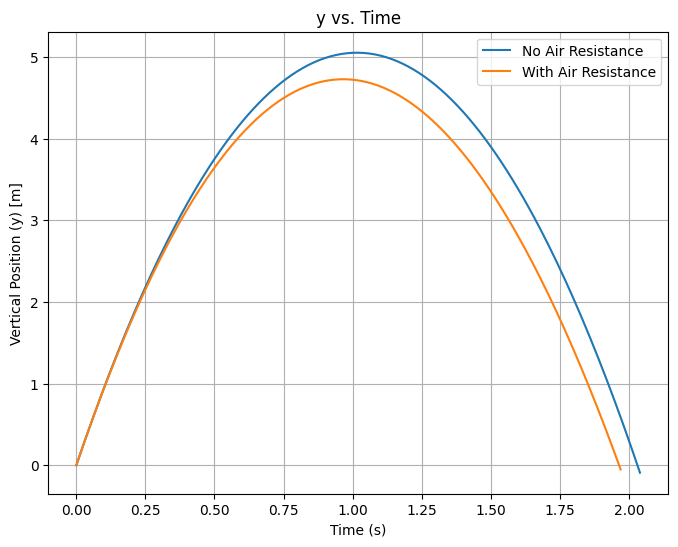

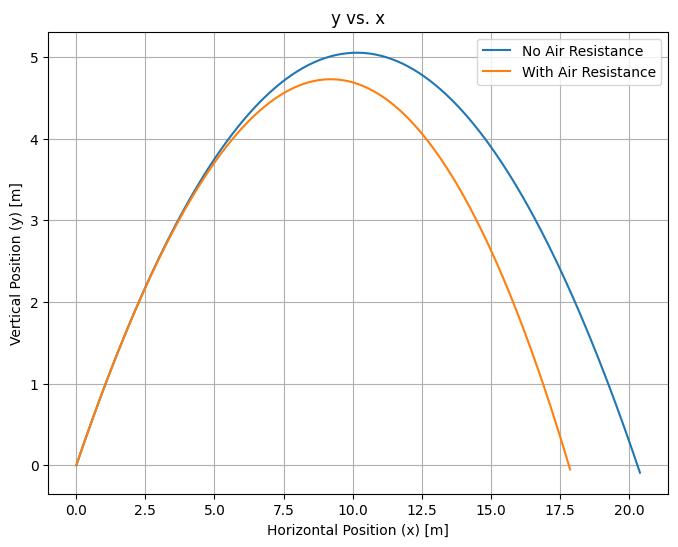

In [35]:
import numpy as np
import matplotlib.pyplot as plt
def SimulateBall(b, total_time):
    dt = 0.01
    g = 9.8
    pos = np.array([0.0, 0.0])
    vel = np.array([10.0, 10.0])
    positions = [pos]
    while pos[1] >= 0:
        air_resistance = -b * vel
        gravity = np.array([0, -g])
        acc = air_resistance + gravity
        vel = vel + acc * dt
        pos = pos + vel * dt
        positions.append(pos)
    return np.array(positions)
positions_no_air = SimulateBall(b=0.0, total_time=2.0)
positions_with_air = SimulateBall(b=0.1, total_time=2.0)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(positions_no_air)) * 0.01, positions_no_air[:, 1], label='No Air Resistance')
plt.plot(np.arange(len(positions_with_air)) * 0.01, positions_with_air[:, 1], label='With Air Resistance')
plt.xlabel('Time (s)')
plt.ylabel('Vertical Position (y) [m]')
plt.title('y vs. Time')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(positions_no_air[:, 0], positions_no_air[:, 1], label='No Air Resistance')
plt.plot(positions_with_air[:, 0], positions_with_air[:, 1], label='With Air Resistance')
plt.xlabel('Horizontal Position (x) [m]')
plt.ylabel('Vertical Position (y) [m]')
plt.title('y vs. x')
plt.legend()
plt.grid()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c.   Running and making plots for dropping a ball.

Now we would like you to set up a simulation which has a ball being dropped.  The ball should have a mass of 1.0 kg and be dropped from a height of 1000 meters.  The air resistance value of $b$ should be 0.3.  Use again a time-step of 0.01.  

🦉We want you to plot
* $y$ vs. $t$
* $v_y$ vs $t$.

We want you to see that the $y$-velocity reaches a terminal velocity (i.e. you stop picking up speed as the object is falling).  🦉Calculate by hand what the terminal velocity should be (consider when the force due to gravity and due to air reistance is the same) and draw a dotted line at this value on the plot (i.e. `plt.axhline(terminalVelocity,linestyle='--')`.  

*Plots and graph here.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation of a falling ball with air resistance
def SimulateDrop(params, total_time):
    dt = params['dt']
    g = params['g']
    b = params['b']
    m = params['mass']

    pos = 1000.0  # Initial height
    vel = 0.0     # Initial velocity

    positions = [pos]
    velocities = [vel]
    times = [0.0]

    t = 0.0
    while pos > 0:
        air_resistance = -b * vel
        gravity = m * g
        acc = (gravity + air_resistance) / m

        vel = vel + acc * dt
        pos = pos + vel * dt
        t += dt

        positions.append(pos)
        velocities.append(vel)
        times.append(t)

    return np.array(times), np.array(positions), np.array(velocities)

# Parameters
params = {
    'mass': 1.0,  # kg
    'g': 9.8,     # m/s^2
    'b': 0.3,     # kg/s
    'dt': 0.01    # time step in seconds
}
total_time = 100  # Maximum simulation time

# Simulate the ball drop
times, positions, velocities = SimulateDrop(params, total_time)

# Terminal velocity (calculated by hand)
terminal_velocity = params['mass'] * params['g'] / params['b']

# Plot y vs. t
plt.figure(figsize=(8, 6))
plt.plot(times, positions, label='y vs. t', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Height (y) [m]')
plt.title('Height vs. Time')
plt.legend()
plt.grid()
plt.show()

# Plot vy vs. t with terminal velocity
plt.figure(figsize=(8, 6))
plt.plot(times, velocities, label='v_y vs. t', color='r')
plt.axhline(terminal_velocity, linestyle='--', color='g', label=f'Terminal Velocity = {terminal_velocity:.2f} m/s')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (v_y) [m/s]')
plt.title('Vertical Velocity vs. Time')
plt.legend()
plt.grid()
plt.show()


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Hitting a target

Let's suppose we want to throw a ball starting at position $(0,0)$ with some initial velocity `v0` (*which you will find*) and have it hit a target on the ground at position $(10.0,0.0)$ m. Let $b=3.0$ and $m=1.0$.  You may again use $dt=0.01$.  **We are going to use `scipy.optimize.minimize` to find the initial velocity.** The library `scipy.optimize` is generically useful.  

To achieve this, first write a function `def myTarget(v,params):` which takes an initial velociy and a `params` dictionary.  The function should return how far (in absolute magnitude) a ball thrown with the parameters in `params` lands from the target (if included, ignore the initial velocity in params).  

Then you can call
```python
ans=scipy.optimize.minimize(myTarget,
                            params['initVel'],
                            args=params,
                            method='Nelder-Mead',
                            options={'disp': True})
```

and the values in `ans.x` should be the velocity you found.

🦉Go ahead and graph the curve you find to make sure it hits close to the target.  Report your initial velocity.

*Plot and graph here. You want to have* `print(ans.x)` *at the end so we can see what your results are.*

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e. Hitting a moving target (extra credit: 5 points)

Here we want to launch two balls. One has fixed parameters
```python
params={
    'b' : 3.0,
    'm' : 1.0,
    'initPos' : np.array([0.0,0.0]),
    'initVel' : np.array([10.0,10.0]),
    'dt'    : 0.01,
    'target': 14.5
}
```
The other has the following parameters but you can optimize the initial velocity
```python
paramsB={
    'b' : 3.0,
    'm' : 1.0,
    'initPos' : np.array([10.0,2.0]),
    'initVel' : np.array([-1.0,1.0]),
    'dt'    : 0.01,
    'target': 14.5
}
```
🦉Figure out how to tune the initial velocity of the second ball so that the two balls collide **in the air**.  Report your initial velocity and convince us that it actually worked.


*Put your code and graph here.  This is a little tricky since both balls are flying.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3:  Second Order Integrators

* **List of collaborators:**

* **References you used in developing your code:**

We saw that the first-order integrator we wrote to get to a time $T$ had errors that scaled as $dt$.  In this exercise we are going to develop a integrator which scales as $dt^2$.  

In our first order technique we had used the position and the velocity at the start of an interval to estimate the force that would act during the interval. We then pretended that the force $F$ and velocity $v$  would remain constant during the interval so that we could calculate the increments to position and velocity as $dx = v(t) dt$ and $dv = [F(x,v,t)/m]dt.$  It was only at the end of each interval that we updated the position and the velocity by adding the increments to them.

We can improve the precision of our integrations by estimating the position, velocity, and force in the **middle** of our step (at time $t+dt/2$), then using that to decide how much the position and velocity will change during the entire time interval $dt$.  Let’s refer to this as a **midpoint integration technique**.

If the position, velocity, and force at the **start** of the interval are $x,v$, and $F$, easonable estimates of the position and velocity at the **midpoint** of the time interval are

$$
\begin{align}
x_\textrm{midpoint} &= x + v \frac{dt}{2}\\
v_\textrm{midpoint} &= v+ \frac{F(x,v,t)}{m} \frac{dt}{2}
\end{align}$$

We can use these to estimate the changes $dx$ in position and $dv$ in velocity during the entire interval of duration $dt$, where $t_\textrm{midpoint}$ is $t + dt/2$:

$$
\begin{align}
dx &= v_\textrm{midpoint} dt\\
dv &= \frac{F(x_\textrm{midpoint},v_\textrm{midpoint},t_\textrm{midpoint})}{m}dt
\end{align}
$$

The approximate values of $x$ and $v$ at the **end** of the interval (and the start o the next) are

$$ x \leftarrow x+dx$$
$$ v \leftarrow v+dv$$
$$ t \leftarrow t+dt$$
**Note that $x$, $v$, and $F$ are all vectors, even though we haven't written the vector symbol over them**



### a. Midpoint Method

Implement this midpoint method replacing your previous `Step` function. Test that it works by verifying you are essentially getting the same results as earlier (it might be slightly different because you have a smaller time step error).

*Code for the midpoint method.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
#ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Measuring the error.

🦉Using your second order method, measure the time-step error of our integrator for a ball with friction in the same way that you did for the first order method.
<!-- * graphing the error it makes after a time $T=1.28$ as a function of $dt \in \{0.00001,0.0001,0.001,0.01,0.02,0.04,0.08,0.16,0.32\}$.
* determining the $\alpha$ in the equation $\textrm{Error} \propto dt^\alpha$.
-->
Use initial conditions of $x_0=0,v_0=10$ m/s. Be sure to include air resistance, as without friction the second order method will be exact (so you won't see a trend).

Unfortunately we don't have a simple formula to get the exact result.  What we will do instead is measure the answer for a time step that is very small ($dt=0.00001$) and use that as our "exact" answer. Then we can compare it to larger time steps.

In the end, we want to determine $\alpha$ in the equation $\textrm{Error} \propto dt^\alpha$ (the symbol $\propto$ means "proportional to"). To get the $\alpha$ we will use the process described in the warmup - i.e. plotting on a log-log plot and computing the slope.

*You should have your plots here.  They should start with the dropping ball initial velocities.   You should show that you are getting error which is second order.*
<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWERE HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 4: Higher Order Integrators (Extra Credit: 15 points total - 5 points/section)

* **List of collaborators:**

* **References you used in developing your code:**

### a. Runge-Kutta (5 points)

We have implemented a first and second order integrator.  We can even use higher order integrators.  The typical one everyone uses is the fourth order Runge-Kutta (RK) integrator - see [wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

🦉 Go ahead and implement a fourth-order RK integrator and show (using the same time-step techniques above) that it is fourth order.  

### b. scipy ODE (5 points)

🦉 Rewrite ThrowBall to use `scipy.integrate.ode`.  

### c. symplectic integrator (5 points)

Implement a symplectic integrator at any order.  Show what order it works at and show that the energy stays close for a much longer period of time then Euler.

---

* Ex 1: George Gollin (original); Bryan Clark and Ryan Levy (modifications)
* Ex 2: Bryan Clark (original)
* Ex 3: George Gollin (original); Bryan Clark and Ryan Levy (modifications)


© Copyright 2021